###### Bag of n_grams: Exercise
* Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

* Fake news spreads faster than Real news and creates problems and fear among groups and in society.

* We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

* You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

* Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

###### About Data: Fake News Detection
* Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

* This data consists of two columns. - Text - label

* Text is the statements or messages regarding a particular event/situation.

* label feature tells whether the given Text is Fake or Real.

* As there are only 2 classes, this problem comes under the Binary Classification.

In [5]:
#import pandas library
import pandas as pd
#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("fake_or_real_news.csv")
#print the shape of dataframe
df.shape
#print top 5 rows
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
#check the distribution of labels
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [8]:
#Add the new column "label_num" which gives a unique number to each of these labels 

#Converting text category into number
df['label_num'] = df['label'].map({
    'FAKE':0,
    'REAL':1
})
#check the results with top 5 rows
df.head(5)

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1


###### Modelling without Pre-processing Text data

In [10]:
#import train-test-split from sklearn 
from sklearn.model_selection import train_test_split
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train,X_test,y_train,y_test = train_test_split(
    df.text,
    df.label_num,
    test_size = 0.2,
    random_state = 98,
    stratify = df.label_num
)

In [13]:
#print the shapes of X_train and X_test
print("Shape of X-train:",X_train.shape)
print("Shape of X-test:",X_test.shape)

Shape of X-train: (5068,)
Shape of X-test: (1267,)


###### Attempt 1 :

1. using sklearn pipeline module create a classification pipeline to classify the Data.
###### Note:
* using CountVectorizer with unigram, bigram, and trigrams.
* use KNN as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
* print the classification report.

In [18]:
#1. create a pipeline object
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
clf = Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range =(1,2))),
    ('knn',KNeighborsClassifier(n_neighbors = 10, metric = 'cosine'))
])
#2. fit with X_train and y_train
clf.fit(X_train,y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       633
           1       0.76      0.73      0.74       634

    accuracy                           0.75      1267
   macro avg       0.75      0.75      0.75      1267
weighted avg       0.75      0.75      0.75      1267



###### Attempt 2 :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

* using CountVectorizer with unigram, bigram, and trigrams.
* use KNN as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
* print the classification report.

In [19]:
clf = Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range =(1,2))),
    ('knn',KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean'))
])
#2. fit with X_train and y_train
clf.fit(X_train,y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       633
           1       0.80      0.68      0.74       634

    accuracy                           0.76      1267
   macro avg       0.76      0.76      0.75      1267
weighted avg       0.76      0.76      0.75      1267



###### Attempt 3 :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.
###### Note:
* using CountVectorizer with only trigrams.
* use RandomForest as the classifier.
* print the classification report.

In [23]:
#1. create a pipeline object
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range =(1,3))),
    ('rf_classifier',RandomForestClassifier())
])
#2. fit with X_train and y_train
clf.fit(X_train,y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       633
           1       0.89      0.86      0.87       634

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267



###### Attempt 4 :
1. using the sklearn pipeline module create a classification pipeline to classify the Data.
###### Note:
* using CountVectorizer with both unigram and bigrams.
* use Multinomial Naive Bayes as the classifier with an alpha value of 0.75.
* print the classification report.

In [28]:
from sklearn.naive_bayes import MultinomialNB
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])
#2. fit with X_train and y_train
clf.fit(X_train,y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.85      0.89       633\n           1       0.87      0.93      0.90       634\n\n    accuracy                           0.89      1267\n   macro avg       0.89      0.89      0.89      1267\nweighted avg       0.89      0.89      0.89      1267\n'

###### Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [29]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [31]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
df['preprocessed_txt'] = df['text'].apply(preprocess)
# this will take some time, please be patient

In [32]:
df.head(5)

,Unnamed: 0,title,text,label,label_num,preprocessed_txt
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,Daniel Greenfield Shillman Journalism Fellow F...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,U.S. Secretary State John F. Kerry say Monday ...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,Kaydee King @KaydeeKing November 9 2016 lesson...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,primary day New York runner Hillary Clinton Do...


###### Build a model with pre processed text

In [34]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Make sure to use only the "preprocessed_txt" column for splitting
X_train,X_test,y_train,y_test = train_test_split(
    df.preprocessed_txt,
    df.label_num,
    test_size = 0.2,
    random_state = 98,
    stratify = df.label_num
    )

###### Let's check the scores with our best model till now
* Random Forest
###### Attempt 1 :
1. using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:
* using CountVectorizer with only trigrams.
* use RandomForest as the classifier.
* print the classification report.

In [40]:
from sklearn.ensemble import RandomForestClassifier
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('rf_classifier', RandomForestClassifier())
])
#2. fit with X_train and y_train
clf.fit(X_train,y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.90      0.90       633\n           1       0.90      0.89      0.89       634\n\n    accuracy                           0.90      1267\n   macro avg       0.90      0.90      0.90      1267\nweighted avg       0.90      0.90      0.90      1267\n'

In [41]:
from sklearn.ensemble import RandomForestClassifier
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(3,3))),
    ('rf_classifier', RandomForestClassifier())
])
#2. fit with X_train and y_train
clf.fit(X_train,y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.71      0.98      0.82       633\n           1       0.96      0.60      0.74       634\n\n    accuracy                           0.79      1267\n   macro avg       0.84      0.79      0.78      1267\nweighted avg       0.84      0.79      0.78      1267\n'

Text(95.72222222222221, 0.5, 'Truth')

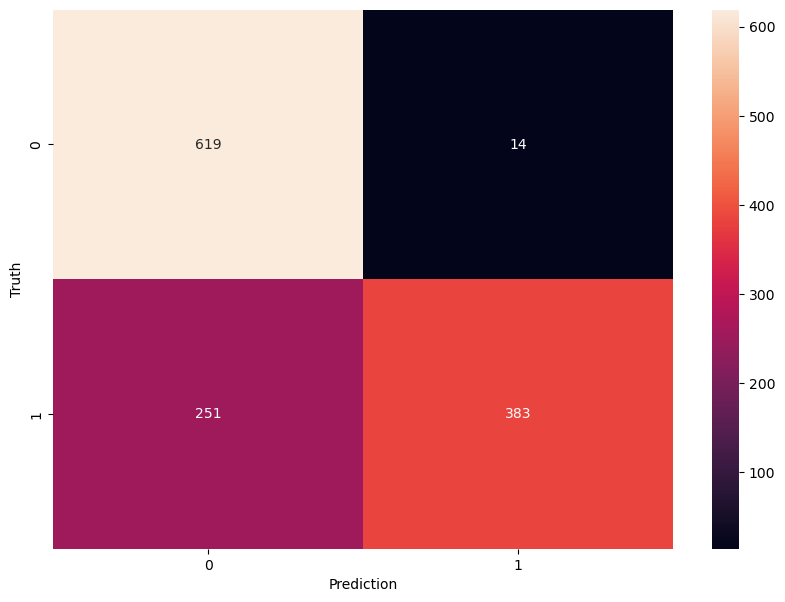

In [42]:
#Confusion Matrix for Best Model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True, fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')